# Analisi Best Model Anno 2018 Sessione 2
### Claudia Gabriela Ochoa Martinez (2020)

#### Analizzando il best model fornito dalla funzione pdredge possiamo allora applicare la funzione predict (pacchetto unmarked) per effettuare ulteriori valutazione sulla bontà del modello.

In [1]:
library(unmarked)

Loading required package: lattice



In [2]:
myunscale <- function (vals, norm.data, col.ids)  {
    cols <- if (missing(col.ids)) 1:NCOL(vals) else col.ids
    #if (length(cols) > NCOL(vals)) 
    #    stop("Incorrect dimension of data to unscale.")
    centers <- attr(norm.data, "scaled:center")[cols]
    scales <- attr(norm.data, "scaled:scale")[cols]
    unvals <- scale(vals[,cols], center = (-centers/scales), scale = 1/scales)
    unvals <- cbind(unvals,vals[,-which(names(vals) %in% cols)])
    attr(unvals, "scaled:center") <- attr(unvals, "scaled:scale") <- NULL
    unvals
}

In [3]:
load('Dati-modelli\\multimodel_2018_sessione_2_YPHO.RData')

In [4]:
best_mod <- occu(formula = ~MDR + orario + precip + temper + vento + 1 ~ 
    alt_m + dominant + MDR + 1, data = arvicole, control = list(trace = 1, 
    maxit = 1e+07))
summary(best_mod)


initial  value 259.236267 
iter  10 value 118.873263
iter  20 value 118.559429
iter  20 value 118.559429
iter  20 value 118.559429
final  value 118.559429 
converged

Call:
occu(formula = ~MDR + orario + precip + temper + vento + 1 ~ 
    alt_m + dominant + MDR + 1, data = arvicole, control = list(trace = 1, 
    maxit = 1e+07))

Occupancy (logit-scale):
                 Estimate    SE       z P(>|z|)
(Intercept)        -1.149 0.663 -1.7326  0.0832
alt_m              -1.190 0.631 -1.8853  0.0594
dominantMuschio    -0.112 1.198 -0.0936  0.9255
dominantOther_Sp    2.863 1.799  1.5916  0.1115
MDR                 0.771 0.614  1.2556  0.2093

Detection (logit-scale):
            Estimate     SE      z  P(>|z|)
(Intercept)  -6.1472 1.0980 -5.599 2.16e-08
MDR           0.0244 0.1773  0.138 8.91e-01
orarioTr      0.9751 0.5505  1.771 7.65e-02
precip        0.4021 0.8097  0.497 6.19e-01
temper        0.2242 0.0815  2.752 5.92e-03
vento         0.3544 0.2803  1.265 2.06e-01

AIC: 259.1189 
Numbe

In [5]:
head(siteCovs_orig$dominant)
head(siteCovs(arvicole))

[1] "Graminacee" "Graminacee" "Graminacee" "Graminacee" "Graminacee"
[6] "Graminacee"

,Diametro.roccia.1..cm.,Diametro.roccia.2..cm.,Diametro.roccia.3..cm.,alt_m,aspect_deg,slope_degr,n_species,MDR,IQR,Esp.tr,cop_veg_ottavi,dominant
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.7999612,0.4449731,0.6121266,-0.9638930,-0.03990354,-0.004945912,0.97220994,0.65969346,-0.7248291,-2.7977585,1.3660940,Graminacee
2,0.7678020,-0.7023655,0.1200460,-1.1064717,0.39997796,0.341267903,0.05432387,0.05605239,0.4943843,-1.1704790,-0.3135298,Graminacee
3,-0.9071587,0.2749970,-0.1449204,-1.1156660,0.51727969,-1.505205774,-0.33905587,-0.36649637,-0.8052168,-0.7365377,-0.3135298,Graminacee
4,-0.2639738,-0.9573296,-0.6370010,-1.1130010,0.39264660,-0.581968936,0.97220994,-1.15122977,-0.3764824,-1.1976003,1.3660940,Graminacee
5,0.6070058,-0.7236125,-0.4288130,-1.0064001,0.39997796,-0.235755121,0.70995678,-0.81922717,0.3470069,-1.1704790,-0.3135298,Graminacee
6,0.1514164,-0.9360826,-0.6370010,-0.9597622,0.51727969,-0.697373540,0.57883019,-1.15122977,0.0254561,-0.7365377,0.8062194,Graminacee


# Predict abundance at specified covariate values.

In [6]:
# Predict abundance at specified covariate values.
df_indicato <- siteCovs(arvicole)
alt_m.seq <- seq(min(df_indicato$alt_m), max(df_indicato$alt_m), length=100)
cop_veg_ottavi.seq <- seq(min(df_indicato$cop_veg_ottavi, na.rm=TRUE), max(df_indicato$cop_veg_ottavi, na.rm=TRUE), length=100)
Esp.tr.seq <- seq(min(df_indicato$Esp.tr), max(df_indicato$Esp.tr), length=100)
MDR.seq <- seq(min(df_indicato$MDR), max(df_indicato$MDR), length=100)


newdat_graminacee <- data.frame(
    alt_m = mean(df_indicato$alt_m),
    MDR = MDR.seq,
    dominant = "Graminacee"
)   
newdat_muschio <- data.frame(
    alt_m = mean(df_indicato$alt_m),
    MDR = MDR.seq,
    dominant = "Muschio"
)
newdat_other <- data.frame(
    alt_m = mean(df_indicato$alt_m),
    MDR = MDR.seq,
    dominant = "Other_Sp"
)
newdata <- rbind(newdat_graminacee,newdat_muschio,newdat_other)
head(newdata)

,alt_m,MDR,dominant
,<dbl>,<dbl>,<fct>
1,2.510224e-14,-1.392686,Graminacee
2,2.510224e-14,-1.336590,Graminacee
3,2.510224e-14,-1.280494,Graminacee
4,2.510224e-14,-1.224398,Graminacee
5,2.510224e-14,-1.168302,Graminacee
6,2.510224e-14,-1.112207,Graminacee


In [7]:
siti_considerati <- 70-length(best_mod@sitesRemoved) # In totale, al massimo nelle analisi consideriamo 70 siti, alcuni anni meno
re <- ranef(best_mod)
EBUP <- bup(re, stat="mean")
CI <- confint(re, level=0.90)
rbind(PAO = c(Estimate = sum(EBUP), colSums(CI))/siti_considerati)

,Estimate,5%,95%
PAO,0.4058813,0.2714286,0.8


In [8]:
Elambda <- predict(best_mod, 
        type='state', 
        newdata = newdata,
        appendData = TRUE)

Elambda_unscaled <- myunscale(Elambda, siteCovs_scaled, c("alt_m","MDR"))
tail(Elambda_unscaled)

,alt_m,MDR,Predicted,SE,lower,upper,dominant
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
295,2789.44,202.7071,0.9910532,0.02769715,0.1954688,0.9999802,Other_Sp
296,2789.44,204.5657,0.9914288,0.02679741,0.1931065,0.9999821,Other_Sp
297,2789.44,206.4242,0.9917888,0.02592454,0.1907375,0.9999838,Other_Sp
298,2789.44,208.2828,0.9921337,0.02507784,0.1883631,0.9999854,Other_Sp
299,2789.44,210.1414,0.9924643,0.02425664,0.1859851,0.9999868,Other_Sp
300,2789.44,212.0000,0.9927811,0.02346029,0.1836047,0.9999881,Other_Sp


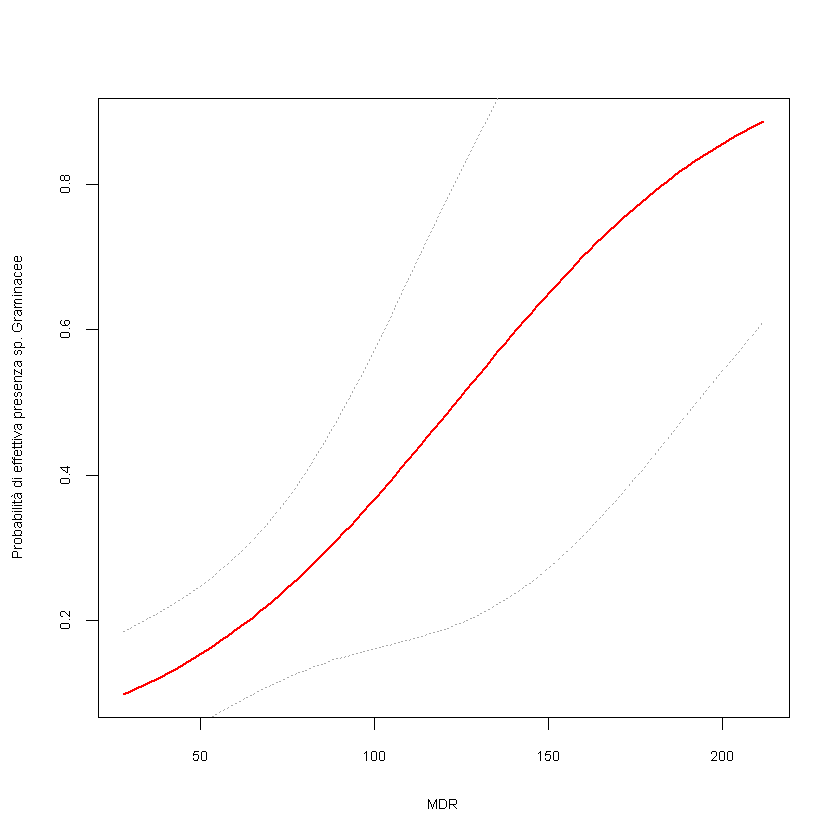

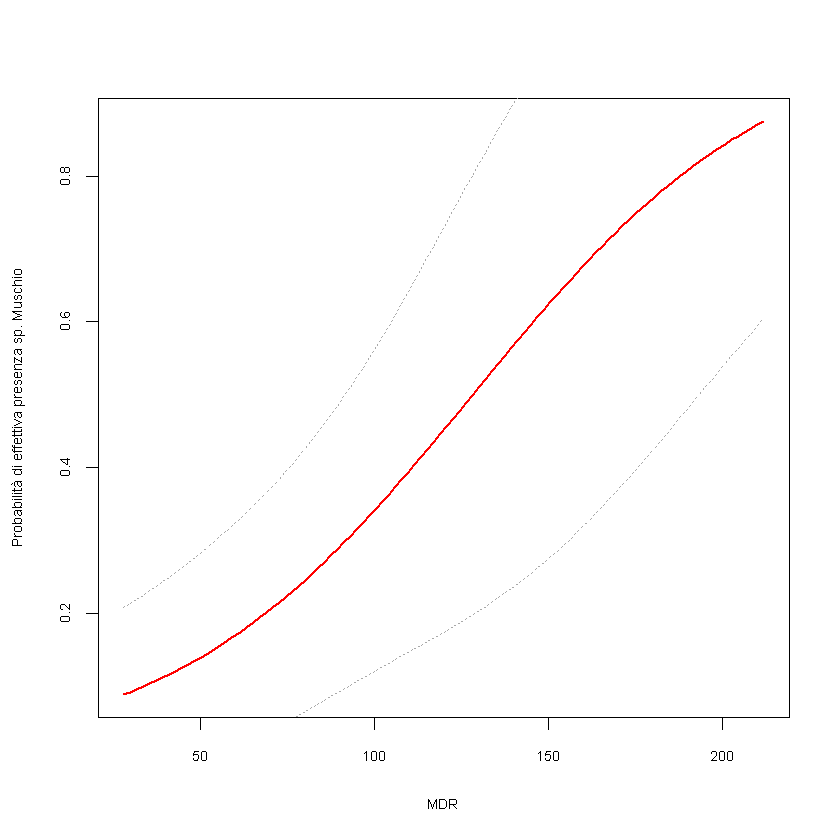

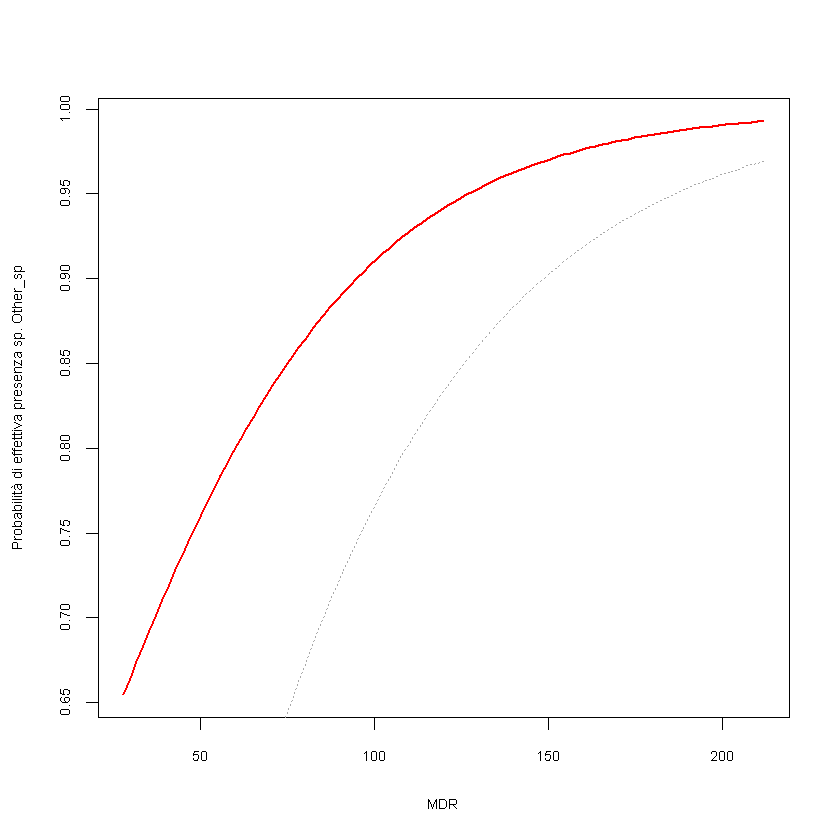

In [9]:
with(subset(Elambda_unscaled,dominant=="Graminacee"), {
  plot(MDR, Predicted, xlab="MDR", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza sp. Graminacee", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=0.7, cex.axis=0.7, lwd=2, col="red")
  lines(MDR, Predicted+SE, lty=3, col="dark grey")
  lines(MDR, Predicted-SE, lty=3, col="dark grey")
  #lines(alt_m, upper, lty=1, col="grey")
  #lines(alt_m, lower, lty=1, col="grey")
})
with(subset(Elambda_unscaled,dominant=="Muschio"), {
  plot(MDR, Predicted, xlab="MDR", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza sp. Muschio", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=0.7, cex.axis=0.7, lwd=2, col="red")
   lines(MDR, Predicted+SE, lty=3, col="dark grey")
   lines(MDR, Predicted-SE, lty=3, col="dark grey")
  #lines(MDR, upper, lty=1, col="grey")
  #lines(MDR, lower, lty=1, col="grey")
})

with(subset(Elambda_unscaled,dominant=="Other_Sp"), {
  plot(MDR, Predicted, xlab="MDR", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza sp. Other_sp", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=0.7, cex.axis=0.7, lwd=2, col="red")
  lines(MDR, Predicted+SE, lty=3, col="dark grey")
  lines(MDR, Predicted-SE, lty=3, col="dark grey")
  #lines(MDR, upper, lty=1, col="grey")
  #lines(MDR, lower, lty=1, col="grey")
})

#### Possiamo notare che vi è una maggior probabilità di cattura con l'aumentare delle dimensione delle rocce come nella sessione 1.

### Proseguiamo con ulteriori valutazioni sulla temperatura

In [10]:
head(obsCovs(arvicole))

,orario,precip,temper,vento
,<fct>,<dbl>,<dbl>,<dbl>
1,Tr,0,6.0,0.0
2,Al,0,9.4,1.7
3,Tr,0,12.6,1.2
4,Al,0,14.4,2.9
5,Tr,0,13.5,1.1
6,Al,0,14.0,0.8


In [11]:
df_indicato <- siteCovs(arvicole)
df_indicato2 <- obsCovs(arvicole)
alt_m.seq <- seq(min(df_indicato$alt_m), max(df_indicato$alt_m), length=100)
cop_veg_ottavi.seq <- seq(min(df_indicato$cop_veg_ottavi, na.rm=TRUE), max(df_indicato$cop_veg_ottavi, na.rm=TRUE), length=100)
Esp.tr.seq <- seq(min(df_indicato$Esp.tr), max(df_indicato$Esp.tr), length=100)
MDR.seq <- seq(min(df_indicato$MDR), max(df_indicato$MDR), length=100)
temper.seq <- seq(min(df_indicato2$temper), max(df_indicato2$temper), length=100)
vento.seq <- seq(min(df_indicato2$vento), max(df_indicato2$vento), length=100)
precip.seq <- seq(min(df_indicato2$precip), max(df_indicato2$precip), length=100)

newdat_tempTr <- data.frame(
    alt_m = mean(df_indicato$alt_m),
    MDR = MDR.seq,
    temper = temper.seq,
    orario = "Tr",
    vento = vento.seq,
    precip = precip.seq
)

Elambda <- predict(best_mod, 
        type='det', 
        newdata = newdat_tempTr,
        appendData = TRUE)



In [12]:
Elambda_unscaled <- myunscale(Elambda, siteCovs_scaled, c("alt_m","MDR"))
tail(Elambda_unscaled)

,alt_m,MDR,Predicted,SE,lower,upper,temper,orario,vento,precip
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
95,2789.44,202.7071,0.4244705,0.3037857,0.06055718,0.8940508,13.88485,Tr,3.608081,0.9494949
96,2789.44,204.5657,0.4347939,0.3096310,0.06112393,0.9008891,13.98788,Tr,3.646465,0.9595960
97,2789.44,206.4242,0.4451741,0.3152701,0.06169100,0.9073386,14.09091,Tr,3.684848,0.9696970
98,2789.44,208.2828,0.4556023,0.3206869,0.06225848,0.9134147,14.19394,Tr,3.723232,0.9797980
99,2789.44,210.1414,0.4660697,0.3258660,0.06282647,0.9191335,14.29697,Tr,3.761616,0.9898990
100,2789.44,212.0000,0.4765670,0.3307926,0.06339505,0.9245107,14.40000,Tr,3.800000,1.0000000


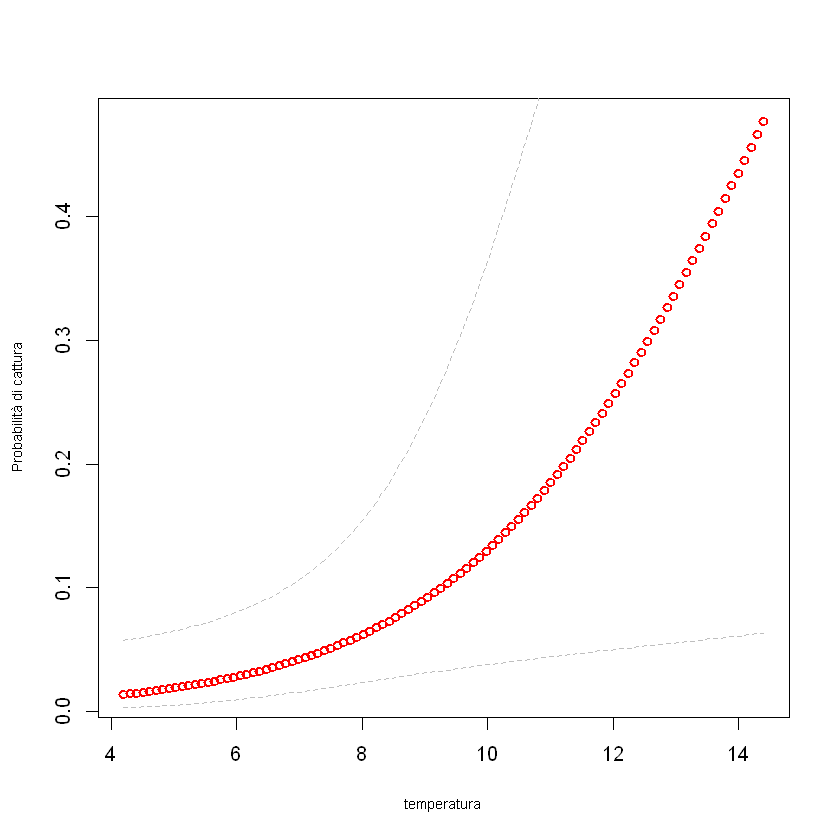

In [13]:
with(Elambda_unscaled, {
    plot(temper, Predicted, xlab="temperatura",
        ylab="Probabilità di cattura",
        cex.lab=0.7, lwd=2, col="red")
    lines(temper, upper, lty=2, col="grey")
    lines(temper, lower,lty=2, col="grey" )
})  

#### Per quanto riguarda la seconda sessione possiamo notare invece, una maggior probabilità di cattura con l'aumentare delle temperature. 